<a href="https://colab.research.google.com/github/PHMark/ML-Personal-Projects/blob/master/Stack_Overflow_Auto_Tagging/Stack_Overflow_Auto_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stack Overflow: Tag Prediction

# 1. Business Problem

## 1.1 Description

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

## 1.2 Source

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

## 1.3 Real World / Business Objectives and Constraints

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

# 2. Machine Learning problem

## 2.1 Data

### 2.1.1 Data Overview


Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


<b>Data Field Explaination</b>

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

### 2.1.2 Example Data point

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

## 2.2 Mapping the real-world problem to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
<b>Credit</b>: http://scikit-learn.org/stable/modules/multiclass.html
</p>

### 2.2.2 Performance metric

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>

https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

# 3. Exploratory Data Analysis
Because the dataset contains huge amount of data (~7gb). As a workaround to save a space in my google drive, I've already done deduplication into it on my own computer and save the reduced file into train_no_dup.db file.

### 3.1.1 Using Pandas with SQLite to Load the data

In [0]:
import sqlite3
import os
import csv

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

STACK_OVERFLOW_DIR = '/content/drive/My Drive/Datasets/stack_overflow_kaggle/'

In [0]:
# Function for pulling data from the database
def get_df_from_db(query):
  connected = False
  while not connected:
    try:
      con = sqlite3.connect(STACK_OVERFLOW_DIR + 'train_no_dup.db')
      connected = True
    except:
      print('Connection Failed, retrying connection...')
      connected = False
  _df = pd.read_sql_query(query, con)
  con.close()
  return _df

In [42]:
df_no_dup = get_df_from_db('SELECT title, body, tags FROM no_dup_train LIMIT 500')
df_no_dup.head()

,Title,Body,Tags
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc


In [172]:
df_no_dup.isna().sum(axis=0)

Title    0
Body     0
Tags     0
dtype: int64

## 3.2 Analysis of Tags 

### 3.2.1 Total number of unique tags

In [44]:
# Get all tags 
tags = get_df_from_db('SELECT tags FROM no_dup_train')
tags.head()

,Tags
0,c++ c
1,c# silverlight data-binding
2,c# silverlight data-binding columns
3,jsp jstl
4,java jdbc


In [0]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
vectorized_tags = vectorizer.fit_transform(tags['Tags'])

In [48]:
print('Total Number of Unique Tags: ', vectorized_tags.shape[1])

Total Number of Unique Tags:  42048


In [50]:
tag_names = vectorizer.get_feature_names()
print('Sample Tags (First 10): ', tag_names[:10])
print('Sample Tags (Last 10): ', tag_names[-10:-1])

Sample Tags (First 10):  ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']
Sample Tags (Last 10):  ['zurb-foundation', 'zvol', 'zwoptex', 'zx81', 'zxing', 'zxspectrum', 'zypper', 'zywall', 'zyxel']


### 3.2.3 Number of times a tag appeared

In [0]:
# Accessing sparse matrix's property
freqs = vectorized_tags.sum(axis=0).A1
result = dict(zip(tag_names, freqs))

In [52]:
#Saving the result into a csv file to avoid memory error.
if not os.path.isfile(STACK_OVERFLOW_DIR + 'tag_counts_dict_dtm.csv'):
  with open(STACK_OVERFLOW_DIR + 'tag_counts_dict_dtm.csv', 'w') as csv_file:
      writer = csv.writer(csv_file)
      for key, value in result.items():
          writer.writerow([key, value])
tag_df = pd.read_csv(STACK_OVERFLOW_DIR + 'tag_counts_dict_dtm.csv', names=['Tags', 'Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [97]:
tag_df_sorted = tag_df.sort_values(by='Counts', ascending=False)
tag_counts = tag_df_sorted['Counts'].values
tag_df_sorted.head(5)

,Tags,Counts
4337,c#,331505
18069,java,299414
27249,php,284103
18157,javascript,265423
1234,android,235436


As what we've said earlier questions related to C#, java, php, javascript has the most query in stack overflow. Let's plot these tags to see their distribution.

In [0]:
# Plotting the distribution of tag counts
import numpy as np
def plot_distribution(counts, title, log_scale=False):
  plt.figure(figsize=(9, 4))
  plt.title(title)
  if log_scale:
    plt.yscale('log')
  plt.grid(True)
  plt.plot(counts)
  plt.show()


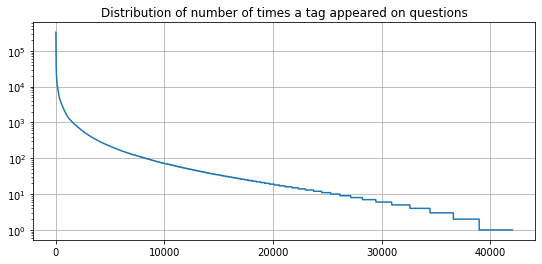

Values:  [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2989   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    3

In [83]:
plot_distribution(tag_counts, 'Distribution of number of times a tag appeared on questions', True)
print('Values: ', tag_counts[:10000:25])

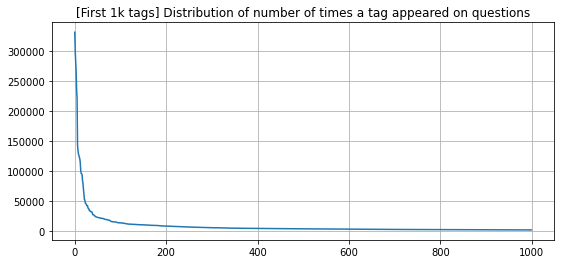

Values:  [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2989   2984   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   24

In [84]:
# Zooming in, plotting the Top 1000 tags
plot_distribution(tag_counts[:1000], '[First 1k tags] Distribution of number of times a tag appeared on questions')
print('Values: ', tag_counts[:1000:5])

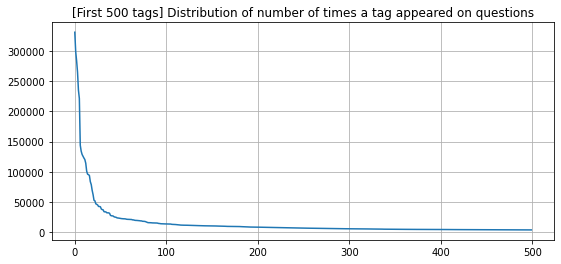

Values:  [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [85]:
# Zooming in, plotting the First 500 tags
plot_distribution(tag_counts[:500], '[First 500 tags] Distribution of number of times a tag appeared on questions')
print('Values: ', tag_counts[:500:5])

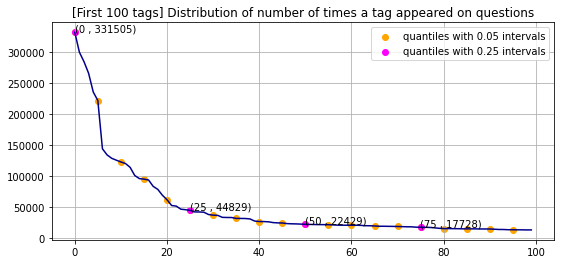

In [88]:
plt.figure(figsize=(9, 4))
plt.title('[First 100 tags] Distribution of number of times a tag appeared on questions')
plt.grid(True)
plt.plot(tag_counts[:100], color='darkblue')
plt.scatter(x=list(range(0, 100, 5)), y=tag_counts[:100:5], color='orange', label='quantiles with 0.05 intervals')
plt.scatter(x=list(range(0, 100, 25)), y=tag_counts[:100:25], color='magenta', label='quantiles with 0.25 intervals')
for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))
plt.legend()
plt.show()

In [98]:
list_tags_gt_10k = tag_df.loc[(tag_df['Counts'] > 10000), 'Tags']
list_tags_gt_1k = tag_df.loc[(tag_df['Counts'] > 1000), 'Tags']

print('Tags that are used in more than 10k questions', len(list_tags_gt_10k))
print('Tags that are used in more than 1k questions', len(list_tags_gt_1k))

Tags that are used in more than 10k questions 153
Tags that are used in more than 1k questions 1557


<b>Observation(s):</b>

1.) There are 153 tags which are used in more than 10k questions.

2.) There are 1,557 tags which are used in more than 1k questions.

3.) The distribution of number of times a tag appeared on questions was highly skewed to the left.

4.) C# was the most used tag (331,505 times) across all of the questions.

5.) Since some tags occur more than the others, Micro F1 Score is an appropriate metric to use to gauge precision and recall effectively.

In [0]:
from scipy.stats import itemfreq

### 3.2.4 Tags per Question

In [0]:
tag_quest_count = list(vectorized_tags.sum(axis=1).A.reshape(-1))

In [117]:
print(tag_quest_count[:5])

[2, 3, 4, 2, 2]


In [0]:
tag_quest_count_freq = np.unique(tag_quest_count, return_counts=True)

In [170]:
print('Minimum Number of Tags per Question: ', tag_quest_count_freq[0].min())
print('Maximum Number of Tags per Question: ', tag_quest_count_freq[0].max())
print('Average Number of Tags per Question: ', tag_quest_count_freq[0].mean())

Minimum Number of Tags per Question:  1
Maximum Number of Tags per Question:  5
Average Number of Tags per Question:  3.0


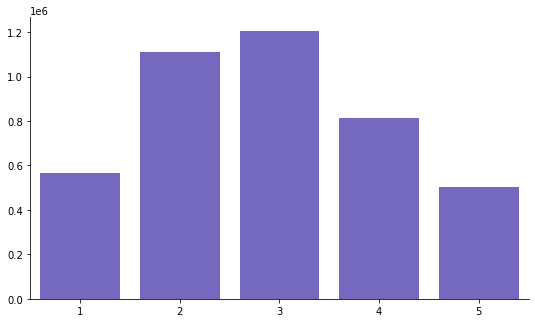

In [210]:
sns.FacetGrid('whitegrid', height=4.5, aspect=1.7)
bar = sns.barplot(x=tag_quest_count_freq[0], y=tag_quest_count_freq[1], color='slateblue')
plt.title('')
plt.show()

<b>Observation(s):</b>

1.) The minimum number of tags per question is 1.

2.) The maximum number of tags per question is 5.

3.) The mean number of tags per question is 3.

4.) Most of the questions has 2 or 3 number of tags associated with them.

### 3.2.5 Most Frequent Tags

In [0]:
from wordcloud import WordCloud

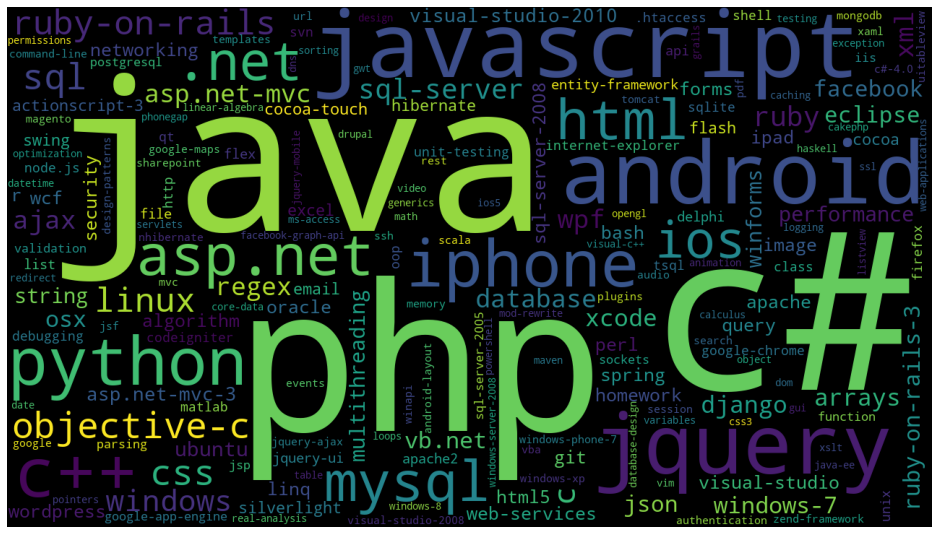

In [186]:
wordcloud = WordCloud(background_color='black', width=1280,
                      height=720).generate_from_frequencies(result)
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud)
plt.axis(False)
plt.show()

<b>Observation(s):</b>
The most dominant tags (in terms of font-size) that we can observe are C#, Java, Php, Python, Javascript, Android, Iphone.

### 3.2.6 The Top 20 Tags

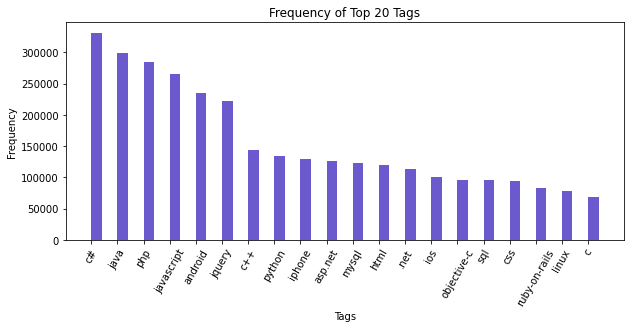

In [209]:
x = np.arange(20)
plt.figure(figsize=(10, 4))
plt.title('Frequency of Top 20 Tags')
plt.bar(tag_df_sorted['Tags'].iloc[:20], 
        height=tag_df_sorted['Counts'].iloc[:20],
        align='edge', width=0.4, color='slateblue')
plt.xticks(rotation=60)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

<b>Observation(s):</b>

1.) Majority of the most of frequent tags are programming language.

2.) C# is the most frequent tag across all of the questions.

3.) There are few operating system tags such as Android, Iphone, iOS, and Linux.


## 3.3 Cleaning and preprocessing of Questions

### 3.3.1 Preprocessing

1.) Sample 1M data points

2.) Separate out code-snippets from Body

3.) Remove Spcial characters from Question title and description (not in code)

4.) Remove stop words (Except 'C')

5.) Remove HTML Tags

6.) Convert all the characters into small letters

7.) Use SnowballStemmer to stem the words